In [1]:
import os
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import glob

In [2]:
yololabel_path_train_HRSID = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "HRSID", "yolo_2", "train", "labels")
yoloimages_path_train_HRSID = os.path.join(r"/home", "tjriz", "Documents", "Senior-Design", "datasets", "HRSID", "yolo_2", "train", "images")

In [3]:
labelfiles_train_HRSID = glob.glob(os.path.join(yololabel_path_train_HRSID, '*.txt'))
imagefiles_train_HRSID = glob.glob(os.path.join(yoloimages_path_train_HRSID, '*.png'))
print(len(labelfiles_train_HRSID))
print(len(imagefiles_train_HRSID))

71731
71731


In [4]:
annotations = []
annotations_fileidx = []

for i in range(len(labelfiles_train_HRSID)):
    with open(labelfiles_train_HRSID[i], 'r') as file:
        for line in file:
            values = line.strip().split()
            class_id = int(values[0])
            x_center, y_center, width, height = map(float, values[1:])
            annotations.append([class_id, x_center, y_center, width, height])
            annotations_fileidx.append(i)

In [5]:
print(len(annotations))
for i in range(4):
    print(annotations[i])

17548
[0, 0.4925, 0.69, 0.195, 0.2]
[0, 0.15, 0.8275, 0.3, 0.165]
[0, 0.37, 0.7775, 0.12, 0.035]
[0, 0.3825, 0.4725, 0.165, 0.265]


In [6]:
is_equal = True
for i in range(len(imagefiles_train_HRSID)):
    test_image = plt.imread(imagefiles_train_HRSID[i])
    img_height, img_width, _ = test_image.shape
    if not(img_height == img_width == 200):
        is_equal = False

if (is_equal):
    print("Images are all 200x200.")
else:
    print("Images are NOT all 200x200")

Images are all 200x200.


In [6]:
count_occurences = 0
annotation_idx = []

for index, annotation in enumerate(annotations):
    norm_width, norm_height = annotation[3], annotation[4]
    if norm_width in (0, 1) or norm_height in (0, 1):
        count_occurences += 1
        annotation_idx.append(index)
        print(annotation)

print("\nOccurences of 0 or 1 normalized width/height values:", count_occurences)

[0, 0.6275, 0.5, 0.745, 1.0]
[0, 0.1625, 0.5, 0.325, 1.0]
[0, 0.5, 0.14, 1.0, 0.28]
[0, 0.5475, 0.5, 0.905, 1.0]
[0, 0.5, 0.67, 1.0, 0.65]
[0, 0.5, 0.49, 1.0, 0.98]
[0, 0.6675, 0.5, 0.665, 1.0]
[0, 0.5, 0.13, 1.0, 0.26]
[0, 0.5, 0.0975, 1.0, 0.195]
[0, 0.5, 0.665, 1.0, 0.67]
[0, 0.5, 0.4725, 1.0, 0.945]
[0, 0.5, 0.295, 1.0, 0.59]
[0, 0.6425, 0.5, 0.715, 1.0]
[0, 0.34, 0.5, 0.68, 1.0]
[0, 0.5, 0.995, 1.0, 0.01]
[0, 0.055, 0.5, 0.11, 1.0]
[0, 0.5, 0.8675, 1.0, 0.265]
[0, 0.5, 0.2575, 1.0, 0.515]
[0, 0.5, 0.845, 1.0, 0.31]
[0, 0.62, 0.5, 0.5, 1.0]
[0, 0.8375, 0.5, 0.325, 1.0]
[0, 0.1825, 0.5, 0.365, 1.0]
[0, 0.81, 0.5, 0.38, 1.0]
[0, 0.9475, 0.5, 0.105, 1.0]
[0, 0.8, 0.5, 0.4, 1.0]
[0, 0.2175, 0.5, 0.435, 1.0]
[0, 0.5, 0.2575, 1.0, 0.515]
[0, 0.5, 0.54, 1.0, 0.92]
[0, 0.1325, 0.5, 0.265, 1.0]
[0, 0.205, 0.5, 0.41, 1.0]
[0, 0.195, 0.5, 0.39, 1.0]
[0, 0.9575, 0.5, 0.085, 1.0]
[0, 0.24, 0.5, 0.48, 1.0]
[0, 0.5, 0.5, 1.0, 1.0]

Occurences of 0 or 1 normalized width/height values: 34


In [7]:
img_dim = 224

# Convert list to a NumPy array and extract width and height columns, scaling them to pixels:
ann_array = np.array(annotations)
dims_in_pixels = ann_array[:, 3:5] * img_dim

# For each bounding box, determine the larger pixel dimension:
largest_dims = dims_in_pixels.max(axis=1)

# Calculate statistics:
min_dim = largest_dims.min()
max_dim = largest_dims.max()
avg_dim = largest_dims.mean()

print("Minimum pixel dimension:", min_dim)
print("Maximum pixel dimension:", max_dim)
print("Average pixel dimension:", avg_dim)

Minimum pixel dimension: 1.12
Maximum pixel dimension: 224.0
Average pixel dimension: 46.9740050148165


In [8]:
print(annotation_idx)

[1045, 1546, 2170, 2179, 3089, 3090, 5129, 5450, 6170, 6645, 6646, 6930, 7529, 8127, 8636, 9137, 9636, 9821, 9938, 10137, 10138, 10778, 10799, 11108, 11229, 11315, 11444, 11818, 12914, 12975, 13177, 15388, 15805, 15833]


In [9]:
len(annotation_idx)

34

In [27]:
test_idx = 9
test_annotation_filedir = labelfiles_train_HRSID[annotations_fileidx[annotation_idx[test_idx]]]

In [28]:
print(test_annotation_filedir)

/home/tjriz/Documents/Senior-Design/datasets/HRSID/yolo_2/train/labels/P0131_13800_14600_9600_10400_0_85664.txt


In [29]:
test_image_filedir = os.path.join(yoloimages_path_train_HRSID, os.path.splitext(os.path.basename(test_annotation_filedir))[0]) + '.png'

In [30]:
print(test_image_filedir)

/home/tjriz/Documents/Senior-Design/datasets/HRSID/yolo_2/train/images/P0131_13800_14600_9600_10400_0_85664.png


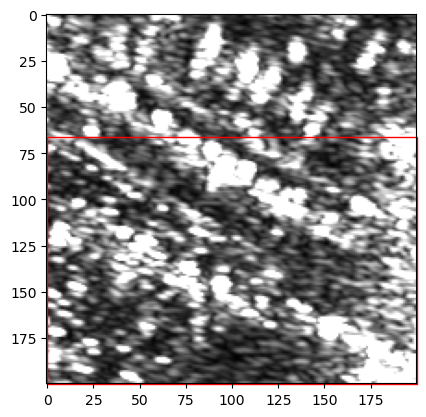

In [31]:
test_image = plt.imread(test_image_filedir)

fig, ax = plt.subplots(1)
ax.imshow(test_image)

# Get test image dimensions
img_height, img_width, _ = test_image.shape

# Plotting bounding boxes overlaying test image, in accordance with YOLO format
class_id, x_center, y_center, width, height = annotations[annotation_idx[test_idx]]

# Convert from normalized to actual pixel values
x_center *= img_width
y_center *= img_height
width *= img_width
height *= img_height

# Calculate the top-left corner of the bounding box for purposes of using patches.Rectangle
x_min = x_center - (width / 2)
y_min = y_center - (height / 2)

# Draw bounding box
rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none', clip_on=False)
ax.add_patch(rect)

plt.show()

In [32]:
# rand_image_num = 123

# rand_imagefile = imagefiles_train_HRSID[rand_image_num]
# rand_imagefile = os.path.join(yoloimages_path_train_HRSID, 'P0001_600_1400_8400_9200_7_1143.png')
rand_imagefile = test_image_filedir
rand_labelfile = os.path.join(yololabel_path_train_HRSID, os.path.splitext(os.path.basename(rand_imagefile))[0]) + '.txt'
rand_annotations = []

with open(rand_labelfile, 'r') as file:
    for line in file:
        values = line.strip().split()
        class_id = int(values[0])
        x_center, y_center, width, height = map(float, values[1:])
        rand_annotations.append([class_id, x_center, y_center, width, height])

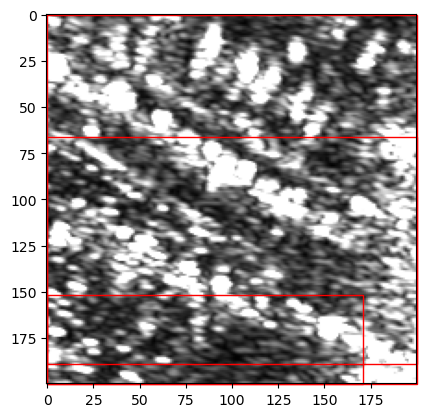

In [34]:
rand_image = plt.imread(rand_imagefile)

fig, ax = plt.subplots(1)
ax.imshow(rand_image)

# Get first example image dimensions
img_height, img_width, _ = rand_image.shape

# Plotting bounding boxes overlaying first example image, in accordance with YOLO format
for annotation in rand_annotations:
    class_id, x_center, y_center, width, height = annotation

    # Convert from normalized to actual pixel values
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    # Calculate the top-left corner of the bounding box for purposes of using patches.Rectangle
    x_min = x_center - (width / 2)
    y_min = y_center - (height / 2)

    # Draw bounding box
    rect = patches.Rectangle((x_min, y_min), width, height, linewidth=1, edgecolor='r', facecolor='none', clip_on=False)
    ax.add_patch(rect)
plt.show()

In [49]:
print(ann_array.shape)

(17548, 5)


In [56]:
norm_widths = ann_array[:,3]
norm_heights = ann_array[:,4]

mean_norm_widths = norm_widths.mean()
mean_norm_heights = norm_heights.mean()

min_norm_widths = norm_widths.min()
min_norm_heights = norm_heights.min()

max_norm_widths = norm_widths.max()
max_norm_heights = norm_heights.max()

var_norm_widths = norm_widths.var()
var_norm_heights = norm_heights.var()

print('Mean of normalized widths:', mean_norm_widths)
print('Mean of normalized heights:', mean_norm_heights)

print('\nMinimum of normalized widths:', min_norm_widths)
print('Minimum of normalized heights:', min_norm_heights)

print('\nMaximum of normalized widths:', max_norm_widths)
print('Maximum of normalized heights:', max_norm_heights)

print('\nVariance of normalized widths:', var_norm_widths)
print('Variance of normalized heights:', var_norm_heights)

Mean of normalized widths: 0.16587531342603146
Mean of normalized heights: 0.1498837474356052

Minimum of normalized widths: 0.005
Minimum of normalized heights: 0.005

Maximum of normalized widths: 1.0
Maximum of normalized heights: 1.0

Variance of normalized widths: 0.017595563892510612
Variance of normalized heights: 0.013892487055206786


In [178]:
np.save('annotation_array.npy', ann_array)

In [179]:
import csv

# Define the CSV file name
csv_filename = "annotations.csv"

with open(csv_filename, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)

    for annotation in annotations:
        writer.writerow(annotation)